In [26]:
import os
import sys
sys.path.append('..')
import torch

import pretorched.visualizers as vutils
from pretorched.models import utils as mutils
import core
from data import VideoFolder

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [28]:
data_root = os.environ.get('DATA_ROOT', '')
part_dir = os.path.join(data_root, 'DeepfakeDetection', 'facenet_videos', 'dfdc_train_part_0')
videos = os.listdir(part_dir)

In [29]:

datadir = os.path.join(part_dir, videos[1])
dataset = VideoFolder(datadir, step=12)
print(dataset)

Dataset VideoFolder
  Root dir: /data/datasets/DeepfakeDetection/facenet_videos/dfdc_train_part_0/bqefygjsnx.mp4
  Number of datapoints: 2
  Transforms (if any): VideoToTensor(rescale=False, ordering='CTHW')



In [30]:
model = core.get_model('ManipulatorDetector')
ckpt_file = 'weights/ManipulatorDetector_resnet18_all_seg_count-16_init-imagenet-ortho_optim-Ranger_lr-0.001_sched-CosineAnnealingLR_bs-33_best.pth.tar'
ckpt_file = 'weights/ManipulatorDetector_resnet18_all_TSNFrameSampler_seg_count-8_init-imagenet-ortho_optim-Ranger_lr-0.001_sched-CosineAnnealingLR_bs-32_best.pth.tar'
ckpt = torch.load(ckpt_file, map_location='cpu')
model.load_state_dict(mutils.remove_prefix(ckpt['state_dict']))
model = model.to(device)

In [31]:
name, frames, target = dataset[0]
frames = frames.unsqueeze(0)

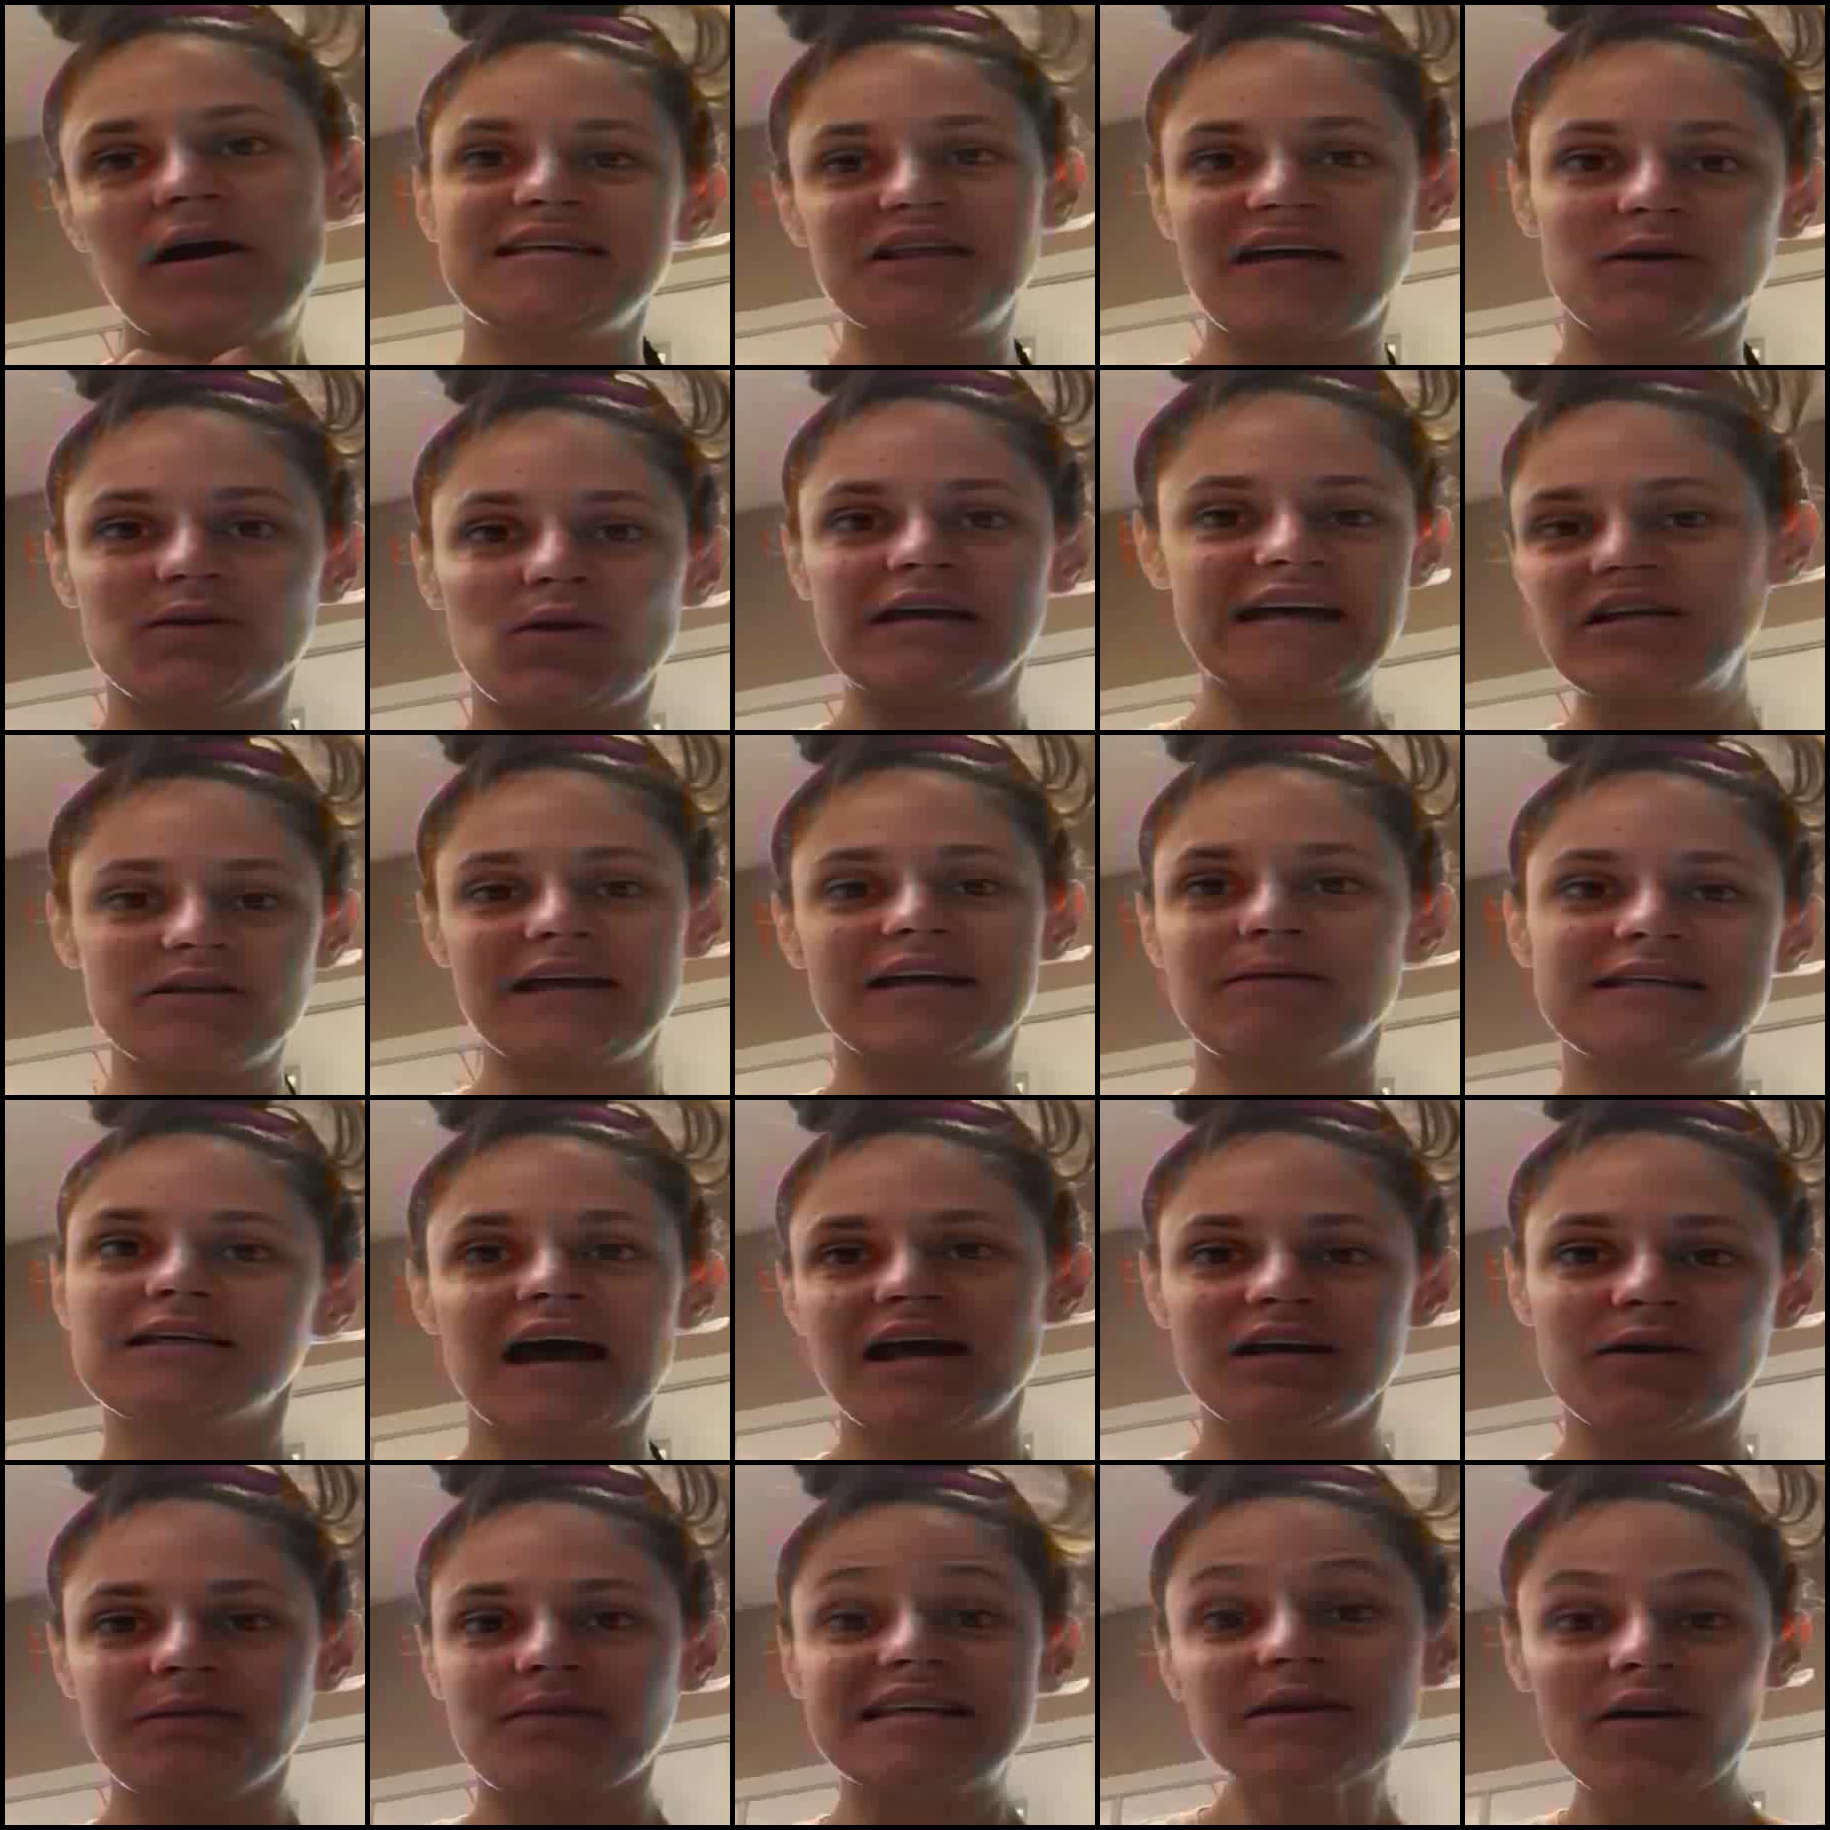

In [32]:
vutils.visualize_samples(frames.squeeze(0).transpose(0, 1), nrow=5)

In [33]:
with torch.no_grad():
    frames = frames.to(device)
    out = model.manipulate(frames, amp=1)

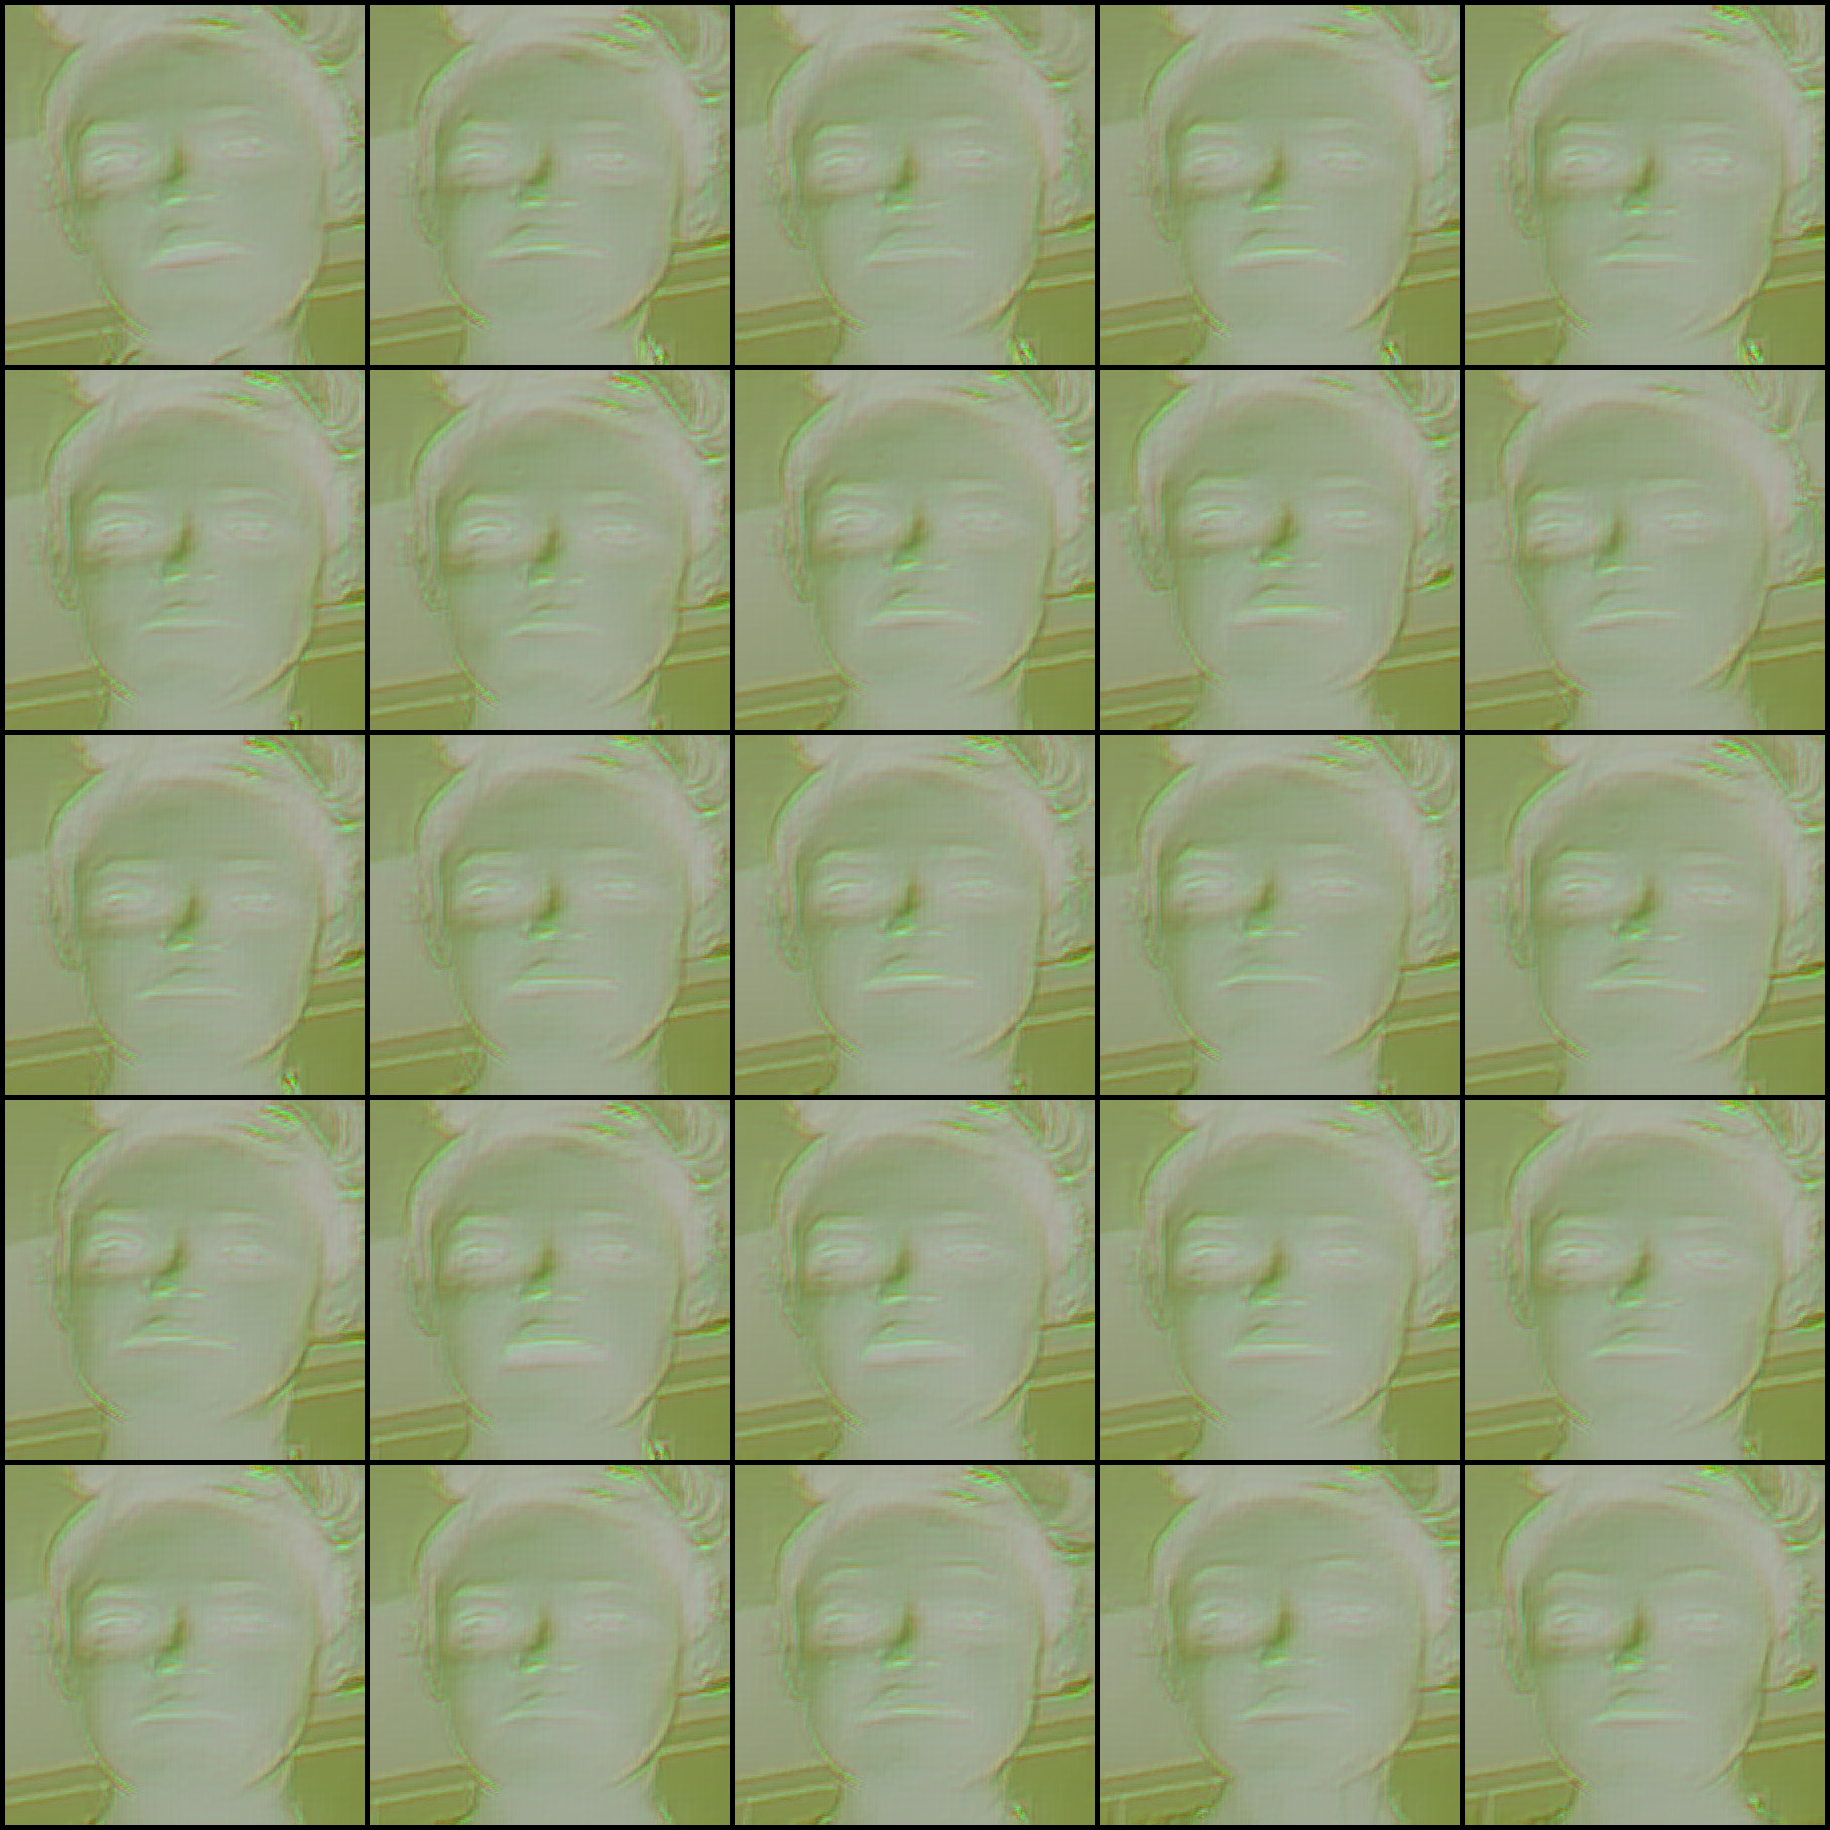

In [34]:
vutils.visualize_samples(out.squeeze(0).transpose(0, 1), nrow=5)